<a href="https://colab.research.google.com/github/pragamarcos/Informe_predictivo_mercado_editorial/blob/main/Informe_predictivo_mercado_editorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Predictivo de Precios en el Mercado Editorial Argentino
## Caso de Estudio: Catálogo Yenny-El Ateneo

---

**Motivación:**  
El mercado editorial argentino presenta una gran variabilidad en los precios de los libros, influenciada por múltiples factores como el género literario, la extensión, el tipo de encuadernación y la editorial. Comprender qué variables determinan el precio de un libro resulta fundamental para optimizar estrategias comerciales, mejorar la competitividad y facilitar la toma de decisiones tanto para editoriales como para distribuidores y vendedores independientes.

**Objetivo:**  
Este proyecto busca analizar el comportamiento de los precios en el catálogo de una de las librerías más importantes de Argentina, identificando patrones y relaciones entre las características de los libros y sus precios de venta al público y finalmente poder armar y mantener un modelo de machine learning que sea capaz de predecir el precio de un libro cuando se tiene por lo menos algunas de las variables claves para ello.

**Audiencia:**  
Este análisis está dirigido a:
- Gerentes comerciales y de producto de editoriales
- Responsables de pricing en librerías y cadenas de retail para gestión de inventario y pricing dinámico.

El foco esta en la carga de datos principales de los libros para que el modelo arroje finalmente un precio medio en base al historico vendido y las condiciones de publicacion (editorial, edicion, nro. de paginas, etc.)

---

Se busca además responder las siguientes preguntas clave:

**1. Análisis Univariado:**
- ¿Cuál es la distribución de precios en el catálogo?
- ¿Qué categorías y géneros literarios dominan el mercado?
- ¿Cómo se distribuye el número de páginas de los libros?
- ¿Cuál es la distribución de tipos de encuadernación?

**2. Análisis Bivariado:**
- ¿Existe correlación entre el número de páginas y el precio?
- ¿Qué categorías literarias tienen los precios más altos en promedio?

**3. Análisis Multivariado:**
- ¿Existen interacciones entre variables que impacten el precio?
- ¿Cuál es el indice de relacion entre las variables?
- ¿Se pueden identificar segmentos de mercado con características similares?

## Configuración del Entorno de Trabajo

Importamos las librerías necesarias para el análisis de datos y visualización.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy import stats
#Seteo también el entorno de matplotlib y seaborn por defecto
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Adquisición de Datos

Los datos fueron obtenidos del catálogo público de **Yenny-El Ateneo**, una de las cadenas de librerías más importantes de Argentina, mediante kaggle usando la informacion que comparten y hacen publica. El dataset se encuentra almacenado en un repositorio de GitHub en formato CSV.

**Fuente de datos:** Catálogo público Yenny-El Ateneo  
**Método de obtención:** Descarga del dataset de Kaggle.com  
**Formato:** CSV  
**Período de recolección:** 2024-2025

In [3]:
url = "https://raw.githubusercontent.com/pragamarcos/publicaciones_libros_ateneo/refs/heads/main/publicaciones_libros_ateneo.csv"
df = pd.read_csv(url)


# EDA - Exploración Inicial del Dataset

### Vista Preliminar de los Datos

Realizamos una primera inspección para revisar la estructura del dataset y las variables disponibles.

In [ ]:
df.sample(10)

,url,codigo_isbn,titulo,autor,editorial,idioma,nro_paginas,fecha_publicacion,encuadernacion,categoria,genero,subgenero,precio
3984,https://www.yenny-elateneo.com/productos/para-...,9789873808661,PARA HACER UNA PRADERA,Emily Dickinson,La Mariposa Y La Iguana,Español,80.0,09/2024,Tapa Blanda,FICCIÓN Y LITERATURA,POESÍA,EN GENERAL,23000
14926,https://www.yenny-elateneo.com/productos/el-cu...,9788410107601,EL CUARTO DE LOS SOMBREROS,Gustavo Martin Garzo,Galaxia Gutenberg,Español,176.0,02/2025,Tapa Blanda,FICCIÓN Y LITERATURA,NOVELAS,GENERAL,26500
7165,https://www.yenny-elateneo.com/productos/johnn...,9788418404375,JOHNNY CASH. LA VIDA EN LETRAS,Johnny Cash,Kultrum,Español,384.0,04/2024,Tapa Dura,"ARTE, ARQUITECTURA Y DISEÑO",MÚSICA,GENERAL,62900
4878,https://www.yenny-elateneo.com/productos/akame...,9788417356927,AKAME GA KILL 07,Tashiro Takahiro,Ivrea,Español,200.0,09/2019,Tapa Blanda,FICCIÓN Y LITERATURA,COMIC'S - NOVELA GRAFICA,NOVELAS GRAFICAS Y MANGA,8500
10689,https://www.yenny-elateneo.com/productos/umana/,9789878512563,UMANA,Caro Luchetta,Dunken,Español,NaN,06/2021,Tapa Blanda,"ARTE, ARQUITECTURA Y DISEÑO",ARTISTAS Y MOVIMIENTOS,ARGENTINOS,18250
9911,https://www.yenny-elateneo.com/productos/baki-...,9791387500467,BAKI THE GRAPPLER ED. KANZENBAN 06,Keisuke Itagaki,Ivrea,Español,350.0,02/2025,Tapa Blanda,FICCIÓN Y LITERATURA,COMIC'S - NOVELA GRAFICA,NOVELAS GRAFICAS Y MANGA,19900
6383,https://www.yenny-elateneo.com/productos/elogi...,9788499925578,ELOGIO DEL OLVIDO,David Rieff,Debate,Español,176.0,07/2017,Tapa Blanda,DERECHO Y CIENCIAS SOCIALES,HISTORIA,HISTORIA UNIVERSAL,48899
2689,https://www.yenny-elateneo.com/productos/la-cu...,9789878432687,LA CURIOSA MARIE CURIE,Nadia Fink,Chirimbote,Español,32.0,09/2024,Tapa Blanda,INFANTIL Y JUVENIL,CUENTOS,EN GENERAL,10500
8189,https://www.yenny-elateneo.com/productos/pero-...,9789878121147,PERO ¿POR QUE NO TE DUERMES?,Adam Wallace,Molino,Español,24.0,06/2023,Tapa Blanda,INFANTIL Y JUVENIL,CUENTOS,EN GENERAL,17499
7982,https://www.yenny-elateneo.com/productos/las-a...,9788413612423,LAS AVENTURAS DEL EQUIPO CIBER 2,Cristina Serret Alonso / Yaiza Rubio,Shackleton,Español,128.0,10/2024,Tapa Blanda,INFANTIL Y JUVENIL,CIENCIAS,EN GENERAL,22000


### Dimensiones del Dataset

Verificamos el tamaño del dataset para entender la cantidad de información disponible para el análisis.

In [ ]:
df.shape

(15642, 13)

### Estructura y Tipos de Datos

Analizamos los tipos de datos de cada variable y verificamos la presencia de valores nulos.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15642 entries, 0 to 15641
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                15642 non-null  object 
 1   codigo_isbn        15642 non-null  int64  
 2   titulo             15642 non-null  object 
 3   autor              15642 non-null  object 
 4   editorial          15642 non-null  object 
 5   idioma             15642 non-null  object 
 6   nro_paginas        14152 non-null  float64
 7   fecha_publicacion  15642 non-null  object 
 8   encuadernacion     15642 non-null  object 
 9   categoria          15642 non-null  object 
 10  genero             15642 non-null  object 
 11  subgenero          15642 non-null  object 
 12  precio             15642 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.6+ MB


In [ ]:
paginas_en_0 = (df['nro_paginas'] == 0).sum()
print (paginas_en_0)

0


In [ ]:
df.describe()

,codigo_isbn,nro_paginas,precio
count,1.564200e+04,14152.000000,15642.000000
mean,9.784091e+12,234.178067,25457.519435
std,1.730505e+11,178.058005,14841.054919
min,7.371864e+11,1.000000,1050.000000
25%,9.788419e+12,120.000000,16000.000000
50%,9.789502e+12,200.000000,23500.000000
75%,9.789876e+12,320.000000,31694.750000
max,9.798988e+12,3872.000000,367080.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
url,0
codigo_isbn,0
titulo,0
autor,0
editorial,0
idioma,0
nro_paginas,1490
fecha_publicacion,0
encuadernacion,0
categoria,0


**Observaciones iniciales:**
- El dataset contiene **13 variables** con información bibliográfica y comercial
- Variables numéricas: `nro_paginas`, `precio`, `codigo_isbn`
- Variables categóricas: `titulo`, `autor`, `editorial`, `idioma`, `encuadernacion`, `categoria`, `genero`, `subgenero`
- Se detectan **1,490 valores nulos** en la columna `nro_paginas` (9.5% del total)

## Limpieza y transformación de datos

Revisamos entonces dentro de la estructura que hay variables cuyo tipo de dato no se corresponde con lo que muestra, por lo que se realiza la modificacion correspondiente para que el tipo de dato de la variable se corrija al que corresponde.

In [ ]:
df['fecha_publicacion'].sample(10)

,fecha_publicacion
7040,04/2024
13091,01/2024
2634,12/2023
7910,01/2025
5098,10/2024
1223,12/2022
8837,11/2024
12264,11/2019
3472,11/2022
14953,10/2013


In [ ]:
df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'])

/tmp/ipython-input-36247937.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'])


In [ ]:
df.dtypes

,0
url,object
codigo_isbn,int64
titulo,object
autor,object
editorial,object
idioma,object
nro_paginas,float64
fecha_publicacion,datetime64[ns]
encuadernacion,object
categoria,object


In [ ]:
df["año_publicacion"] = df["fecha_publicacion"].dt.year
df["mes_publicacion"] = df["fecha_publicacion"].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15642 entries, 0 to 15641
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   url                15642 non-null  object        
 1   codigo_isbn        15642 non-null  int64         
 2   titulo             15642 non-null  object        
 3   autor              15642 non-null  object        
 4   editorial          15642 non-null  object        
 5   idioma             15642 non-null  object        
 6   nro_paginas        14152 non-null  float64       
 7   fecha_publicacion  15642 non-null  datetime64[ns]
 8   encuadernacion     15642 non-null  object        
 9   categoria          15642 non-null  object        
 10  genero             15642 non-null  object        
 11  subgenero          15642 non-null  object        
 12  precio             15642 non-null  int64         
 13  año_publicacion    15642 non-null  int32         
 14  mes_pu

In [ ]:
df['mes_publicacion'].sample(10)

,mes_publicacion
8381,8
7504,1
13092,1
15411,3
44,7
14499,1
8701,5
7578,11
8332,6
9623,8


Finalmente eliminamos la variable que no vamos a usar mas y tambien borramos la variable URL que no encontramos util para el analisis

In [ ]:
df = df.drop(columns=["fecha_publicacion","url"])

### Enriquecimiento de Datos Faltantes mediante APIs

Debido a que el 9.5% de los libros no tienen información sobre el número de páginas, implementamos una estrategia de enriquecimiento de datos consultando dos APIs públicas de información bibliográfica:

1. **Google Books API:** Primera fuente de consulta
2. **Open Library API:** Fuente alternativa para datos no encontrados

**Estrategia de implementación:**
- Consulta secuencial: primero Google Books, luego Open Library
- Manejo de errores y timeouts
- Respeto de límites de tasa de peticiones

In [ ]:
faltantes = df['nro_paginas'].isna().sum()
faltantes

np.int64(1490)

In [ ]:
paginas_en_0 = (df['nro_paginas'] == 0).sum()
print (paginas_en_0)

0


In [ ]:
# Ejemplo de ISBN
isbn_prueba = "9789873506208"

# URL de la API de Google Books
url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn_prueba}"

try:
    response = requests.get(url, timeout=10)
    if response.status_code == 200:
        print("✅ Conexión exitosa a Google Books API")
        data = response.json()
        if data.get("totalItems", 0) > 0:
            info_libro = data["items"][0]["volumeInfo"]
            paginas = info_libro.get("pageCount", "No disponible")
            titulo = info_libro.get("title", "Sin título")
            print(f"Título: {titulo}")
            print(f"Número de páginas: {paginas}")
        else:
            print("No se encontraron datos para ese ISBN")
    else:
        print(f"❌ Error en la conexión: Status code {response.status_code}")
except requests.exceptions.RequestException as e:
    print(f"❌ Error de conexión: {e}")


✅ Conexión exitosa a Google Books API
No se encontraron datos para ese ISBN


In [ ]:
df['codigo_isbn'] = df['codigo_isbn'].astype(str)
def obtener_paginas_google(isbn):
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        if data.get("totalItems", 0) > 0:
            info_libro = data["items"][0]["volumeInfo"]
            return info_libro.get("pageCount", None)
        else:
            return None
    except requests.exceptions.RequestException:
        return None

# Reemplazar NaN en nro_paginas
isbn_faltantes = df[df['nro_paginas'].isna()]['codigo_isbn'].tolist()

for idx, isbn in zip(df[df['nro_paginas'].isna()].index, isbn_faltantes):
    paginas = obtener_paginas_google(isbn)
    if paginas is not None:
        df.at[idx, 'nro_paginas'] = paginas

    print(f"ISBN {isbn} procesado, páginas: {paginas}")

ISBN 9788469622773 procesado, páginas: 24
ISBN 9786075275505 procesado, páginas: 556
ISBN 9789876420662 procesado, páginas: None
ISBN 9789873504716 procesado, páginas: 100
ISBN 9789874132574 procesado, páginas: None
ISBN 9789878536293 procesado, páginas: 71
ISBN 9789874647375 procesado, páginas: 0
ISBN 9780241501108 procesado, páginas: None
ISBN 9780593310007 procesado, páginas: 161
ISBN 9786071440921 procesado, páginas: None
ISBN 9789876420136 procesado, páginas: None
ISBN 9789878509686 procesado, páginas: None
ISBN 9789876132985 procesado, páginas: 0
ISBN 9789874132567 procesado, páginas: None
ISBN 9786074005417 procesado, páginas: 0
ISBN 9789878535128 procesado, páginas: None
ISBN 9788497945349 procesado, páginas: 0
ISBN 9789500531085 procesado, páginas: 161
ISBN 9789874909275 procesado, páginas: None
ISBN 9780593659120 procesado, páginas: 0
ISBN 9788430569151 procesado, páginas: 8
ISBN 9788418765438 procesado, páginas: 0
ISBN 9789876128063 procesado, páginas: 0
ISBN 9788417537791 p

In [ ]:
faltantes = df['nro_paginas'].isna().sum()
total = len(df)

print(f"Total de libros: {total}")
print(f"Libros sin nro_paginas: {faltantes}")
print(f"Porcentaje faltante: {faltantes/total:.2%}")


Total de libros: 15642
Libros sin nro_paginas: 1358
Porcentaje faltante: 8.68%


In [ ]:
import requests

def obtener_paginas_openlibrary(isbn):
    url = f"https://openlibrary.org/api/books?bibkeys=ISBN:{isbn}&jscmd=data&format=json"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        key = f"ISBN:{isbn}"
        if key in data:
            return data[key].get("number_of_pages", None)
        return None
    except requests.exceptions.RequestException:
        return None


# Filtramos solo los que siguen con nulos
isbn_faltantes = df[(df['nro_paginas'].isna())]['codigo_isbn'].tolist()

exitos = 0
fallidos = 0

for idx, isbn in zip(df[(df['nro_paginas'].isna()) | (df['nro_paginas'] == 0)].index, isbn_faltantes):
    paginas = obtener_paginas_openlibrary(isbn)
    if paginas is not None:
        df.at[idx, 'nro_paginas'] = paginas
        exitos += 1
    else:
        fallidos += 1


print("✅ Reemplazos realizados:", exitos)
print("❌ Sin datos encontrados:", fallidos)
print("📊 Total procesados:", exitos + fallidos)

✅ Reemplazos realizados: 0
❌ Sin datos encontrados: 0
📊 Total procesados: 0


In [ ]:
columnas_corregidas = df['nro_paginas'].isna().sum()
print(f"Total de libros sin nro_paginas después de intentar corregir: {columnas_corregidas}")

Total de libros sin nro_paginas después de intentar corregir: 1044


In [ ]:
paginas_en_0 = (df['nro_paginas'] == 0).sum()
print (paginas_en_0)

76


### Eliminacion de datos nulos

Entendemos desde el analisis que el nro. de paginas es una variable demasiado importante y relacionada al target como para simplemente reemplazarla por la media o mediana porque de esa manera alteraria y sesgaria el modelo de manera tal que podria no lleagr a servir en un futuro o no arrojar precios que sean realmente competitivos en el mercado. Por esto se decide eliminar los registros nulos y en 0 despues del enriquecimiento que se hace desde la API para que de esta forma la el resultado se mantenga lo mas acertado y cerca de la realidad.

In [ ]:
df.drop(df[df['nro_paginas'] == 0].index, inplace=True)
df.dropna(subset=['nro_paginas'], inplace=True)

## Examen Gráfico de los Datos y Análisis de Correlaciones y Dependencias

### Analisis Univariado

Analizamos primero y de manera sencilla la variable target:

In [ ]:
print(" ESTADÍSTICAS DE PRECIOS:")
print(f"   Media: ${df['precio'].mean():,.2f}")
print(f"   Mediana: ${df['precio'].median():,.2f}")
print(f"   Moda: ${df['precio'].mode()[0]:,.2f}")
print(f"   Desv. Estándar: ${df['precio'].std():,.2f}")
print(f"   Mínimo: ${df['precio'].min():,.2f}")
print(f"   Máximo: ${df['precio'].max():,.2f}")
print(f"   Rango Intercuartil (IQR): ${df['precio'].quantile(0.75) - df['precio'].quantile(0.25):,.2f}")


 ESTADÍSTICAS DE PRECIOS:
   Media: $25,548.27
   Mediana: $23,900.00
   Moda: $7,500.00
   Desv. Estándar: $14,561.17
   Mínimo: $1,050.00
   Máximo: $367,080.00
   Rango Intercuartil (IQR): $15,600.00


In [ ]:
# Calcular skewness y kurtosis
skewness = df['precio'].skew()
kurtosis = df['precio'].kurtosis()

print(f"  Asimetría (Skewness): {skewness:.2f}")
print(f"  Curtosis (Kurtosis): {kurtosis:.2f}")

# Generamos insight condicional dependiendo del resultado
print(f"\n💡 INSIGHT:")
if skewness > 1 and kurtosis > 3:
    print("   El mercado tiene MUCHOS libros económicos en un rango estrecho,")
    print("   pero también tiene bastantes libros PREMIUM muy caros (que puede ser util en caso de ir por esa opcion exclusivamente).")
elif skewness > 1 and kurtosis < 3:
    print("   El mercado tiene precios dispersos con tendencia hacia valores bajos,")
    print("   pero sin concentración extrema en ningún rango.")

  Asimetría (Skewness): 3.65
  Curtosis (Kurtosis): 44.82

💡 INSIGHT:
   El mercado tiene MUCHOS libros económicos en un rango estrecho,
   pero también tiene bastantes libros PREMIUM muy caros (que puede ser util en caso de ir por esa opcion exclusivamente).


Hacemos un grafico de la distribución de precios:

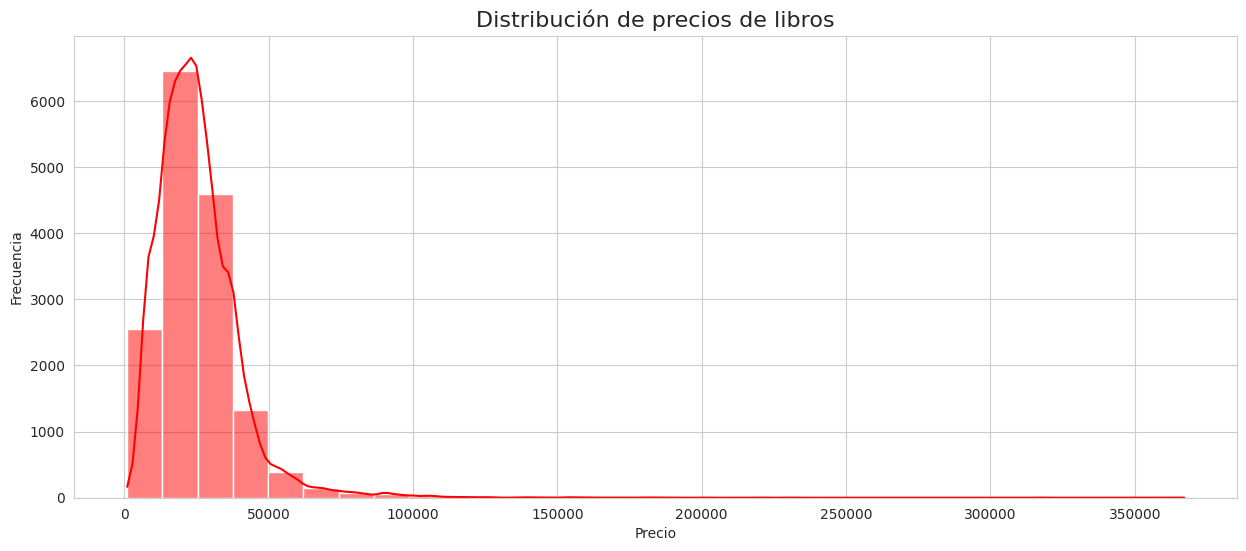

In [ ]:


plt.figure(figsize=(15,6))
sns.histplot(df['precio'], kde=True, bins=30, color='red')

# Añadimos título y etiquetas
plt.title("Distribución de precios de libros", fontsize=16)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

plt.show()

Revisamos entonces cuales son las categorias mas vendidas

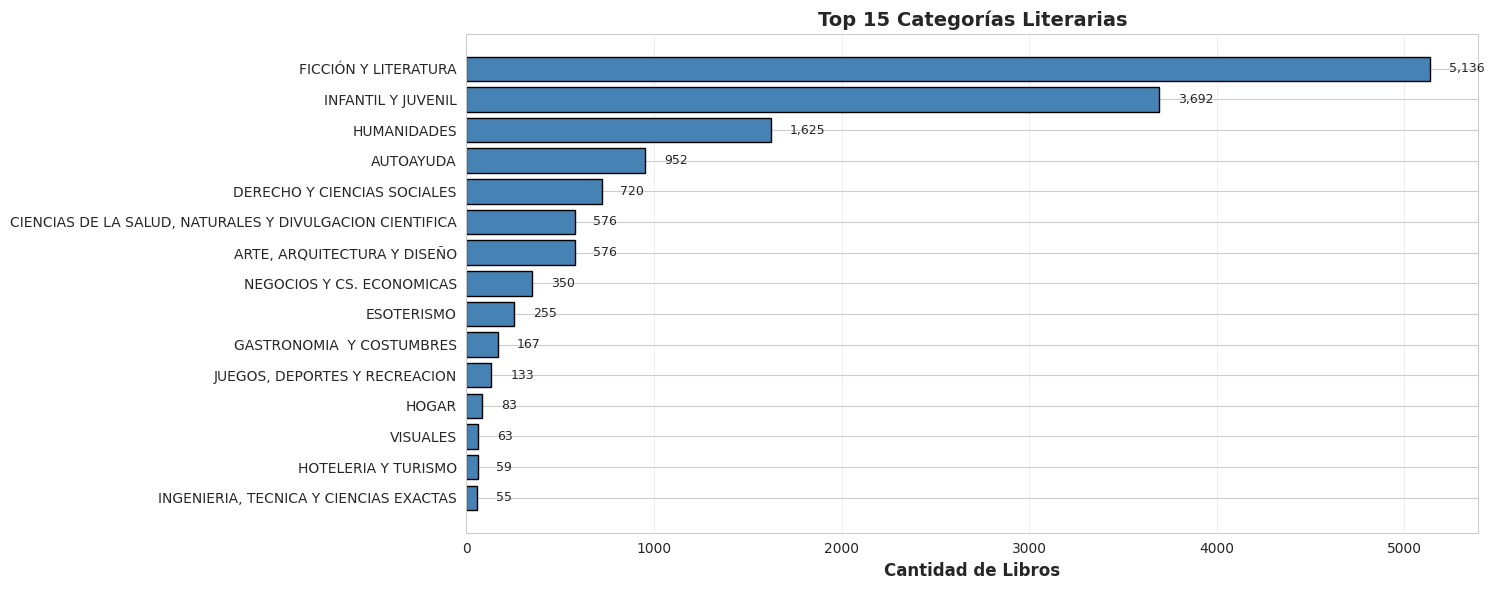

In [ ]:
top_categorias = df['categoria'].value_counts().head(15)

plt.figure(figsize=(15, 6))
plt.barh(range(len(top_categorias)), top_categorias.values, color='steelblue', edgecolor='black')
plt.yticks(range(len(top_categorias)), top_categorias.index, fontsize=10)
plt.xlabel('Cantidad de Libros', fontsize=12, fontweight='bold')
plt.title('Top 15 Categorías Literarias', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_categorias.values):
    plt.text(v + 100, i, f'{v:,}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

Agregamos estadisticas de las paginas de los libros

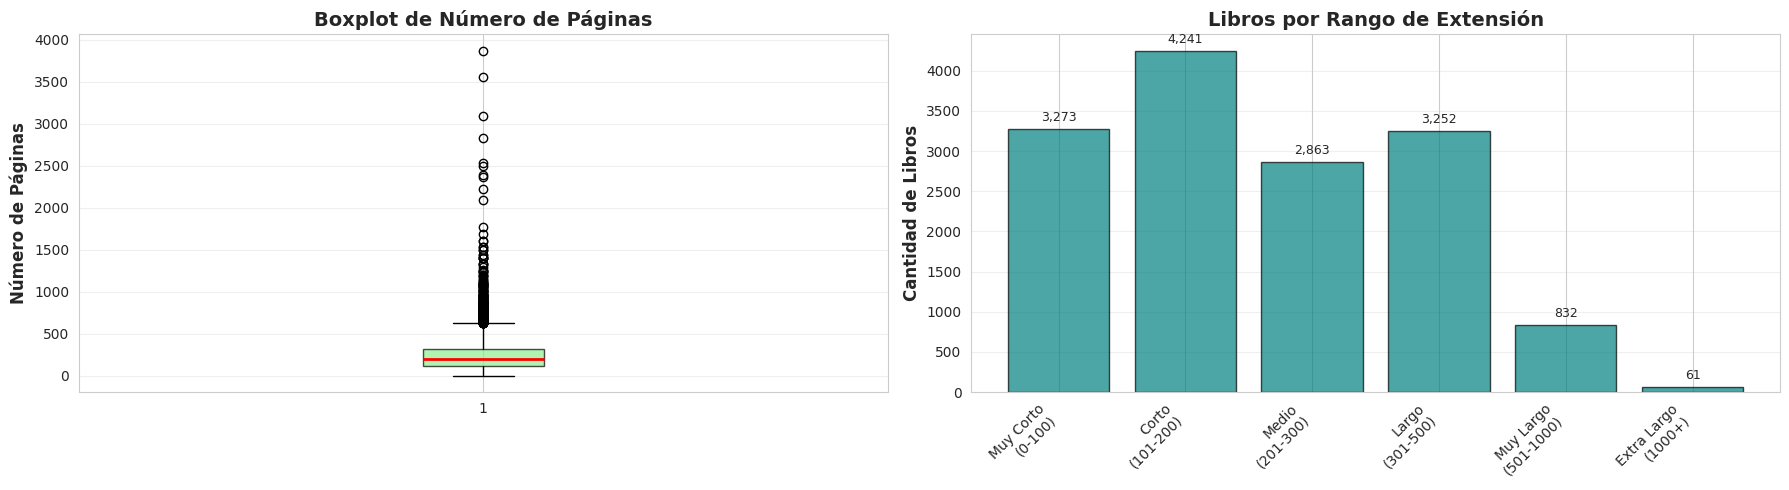


📖 ESTADÍSTICAS DE PÁGINAS:
   Media: 235 páginas
   Mediana: 200 páginas
   Mínimo: 1 páginas
   Máximo: 3872 páginas


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Boxplot
axes[0].boxplot(df['nro_paginas'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_ylabel('Número de Páginas', fontsize=12, fontweight='bold')
axes[0].set_title('Boxplot de Número de Páginas', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Categorización por extensión
bins = [0, 100, 200, 300, 500, 1000, 5000]
labels = ['Muy Corto\n(0-100)', 'Corto\n(101-200)', 'Medio\n(201-300)',
          'Largo\n(301-500)', 'Muy Largo\n(501-1000)', 'Extra Largo\n(1000+)']
df_paginas_cat = pd.cut(df['nro_paginas'], bins=bins, labels=labels)
conteo_cat = df_paginas_cat.value_counts().sort_index()

axes[1].bar(range(len(conteo_cat)), conteo_cat.values, color='teal', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(conteo_cat)))
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].set_ylabel('Cantidad de Libros', fontsize=12, fontweight='bold')
axes[1].set_title('Libros por Rango de Extensión', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Agregar valores
for i, v in enumerate(conteo_cat.values):
    axes[1].text(i, v + 100, f'{v:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n📖 ESTADÍSTICAS DE PÁGINAS:")
print(f"   Media: {df['nro_paginas'].mean():.0f} páginas")
print(f"   Mediana: {df['nro_paginas'].median():.0f} páginas")
print(f"   Mínimo: {df['nro_paginas'].min():.0f} páginas")
print(f"   Máximo: {df['nro_paginas'].max():.0f} páginas")

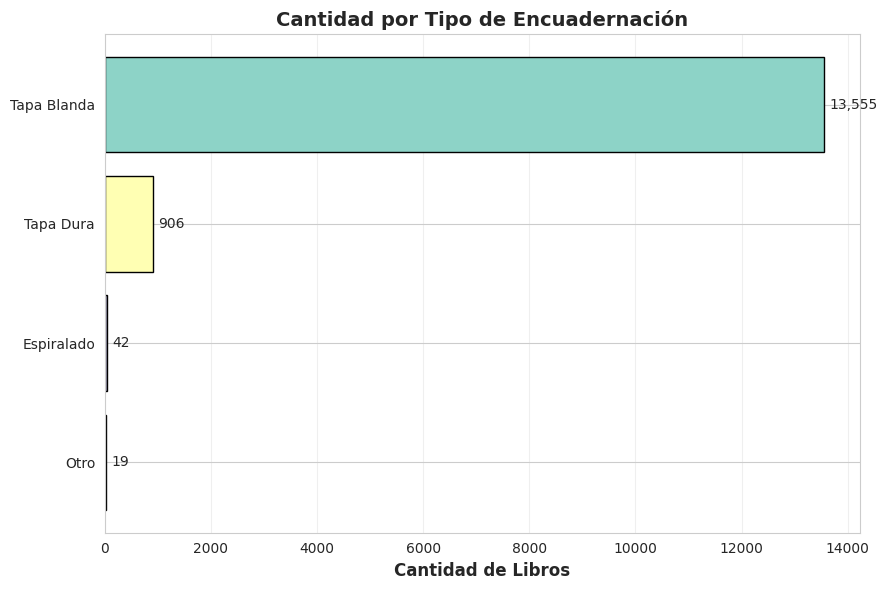


📘 ANÁLISIS DE ENCUADERNACIÓN (Cantidad):
   Tipo más frecuente: Tapa Blanda (13,555 libros)
   Tipos menos frecuentes: Otro (19 libros)


In [ ]:
encuadernacion_counts = df['encuadernacion'].value_counts()
colores = plt.cm.Set3(range(len(encuadernacion_counts)))


plt.figure(figsize=(9, 6))
plt.barh(
    range(len(encuadernacion_counts)),
    encuadernacion_counts.values,
    color=colores,
    edgecolor='black'
)
plt.yticks(range(len(encuadernacion_counts)), encuadernacion_counts.index)
plt.xlabel('Cantidad de Libros', fontsize=12, fontweight='bold')
plt.title('Cantidad por Tipo de Encuadernación', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

#Etiquetas de valores
for i, v in enumerate(encuadernacion_counts.values):
    plt.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Análisis condicional
print(f"\n📘 ANÁLISIS DE ENCUADERNACIÓN (Cantidad):")
print(f"   Tipo más frecuente: {encuadernacion_counts.index[0]} ({encuadernacion_counts.values[0]:,} libros)")
print(f"   Tipos menos frecuentes: {encuadernacion_counts.index[-1]} ({encuadernacion_counts.values[-1]:,} libros)")


### Analisis Bivariado: Relaciones entre variables

En primera instancia y para entender si lo que hicimos al eliminar los registros nulos y los que estaban en 0 vamos a expresar la relacion entre la cantidad de paginas y el precio:

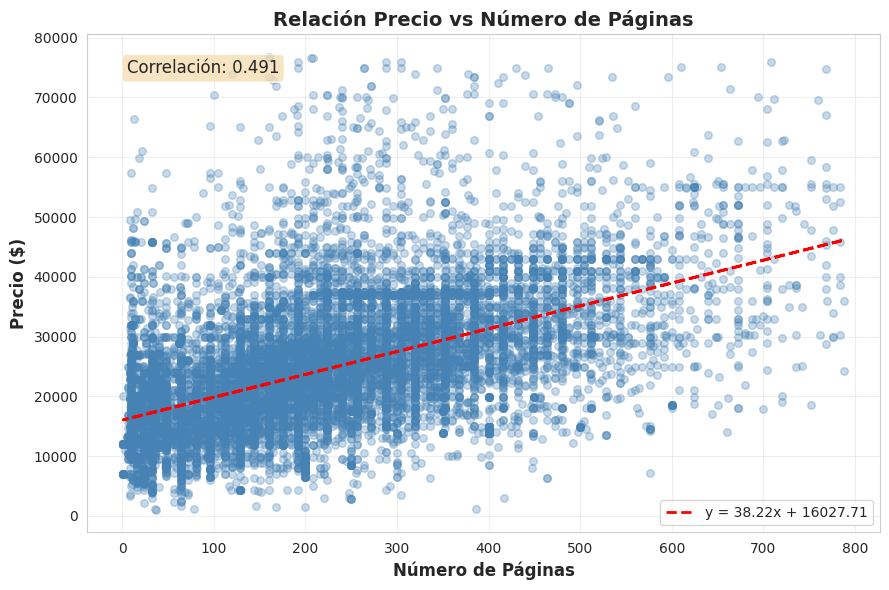


📊 CORRELACIÓN PRECIO vs PÁGINAS:
   Coeficiente de correlación: 0.491
   Interpretación: Correlación MODERADA positiva


In [ ]:
df_clean = df[(df['precio'] < df['precio'].quantile(0.99)) &
              (df['nro_paginas'] < df['nro_paginas'].quantile(0.99))]

plt.figure(figsize=(9, 6))


plt.scatter(df_clean['nro_paginas'], df_clean['precio'], alpha=0.3, s=30, color='steelblue')


z = np.polyfit(df_clean['nro_paginas'], df_clean['precio'], 1)
p = np.poly1d(z)
plt.plot(df_clean['nro_paginas'], p(df_clean['nro_paginas']),
             "r--", linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

# Calculamos correlación
correlacion = df_clean['nro_paginas'].corr(df_clean['precio'])
plt.text(0.05, 0.95, f'Correlación: {correlacion:.3f}',
             transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.xlabel('Número de Páginas', fontsize=12, fontweight='bold')
plt.ylabel('Precio ($)', fontsize=12, fontweight='bold')
plt.title('Relación Precio vs Número de Páginas', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 CORRELACIÓN PRECIO vs PÁGINAS:")
print(f"   Coeficiente de correlación: {correlacion:.3f}")
if correlacion > 0.7:
    print(f"   Interpretación: Correlación FUERTE positiva")
elif correlacion > 0.4:
    print(f"   Interpretación: Correlación MODERADA positiva")
elif correlacion > 0.2:
    print(f"   Interpretación: Correlación DÉBIL positiva")
else:
    print(f"   Interpretación: Correlación MUY DÉBIL o nula")

Vemos que si bien la relacion es positiva no es algo que este TAN proporcionalmente relacionado de manera directa. Entendemos de todas formas que al ser positiva la relacion y estar tan cerca del 0.5 el coeficiente entonces se ha hecho lo correcto al eliminar los registros en 0 y NaN para que el analisis no quede sesgado y el dataset se limpie para el modelo

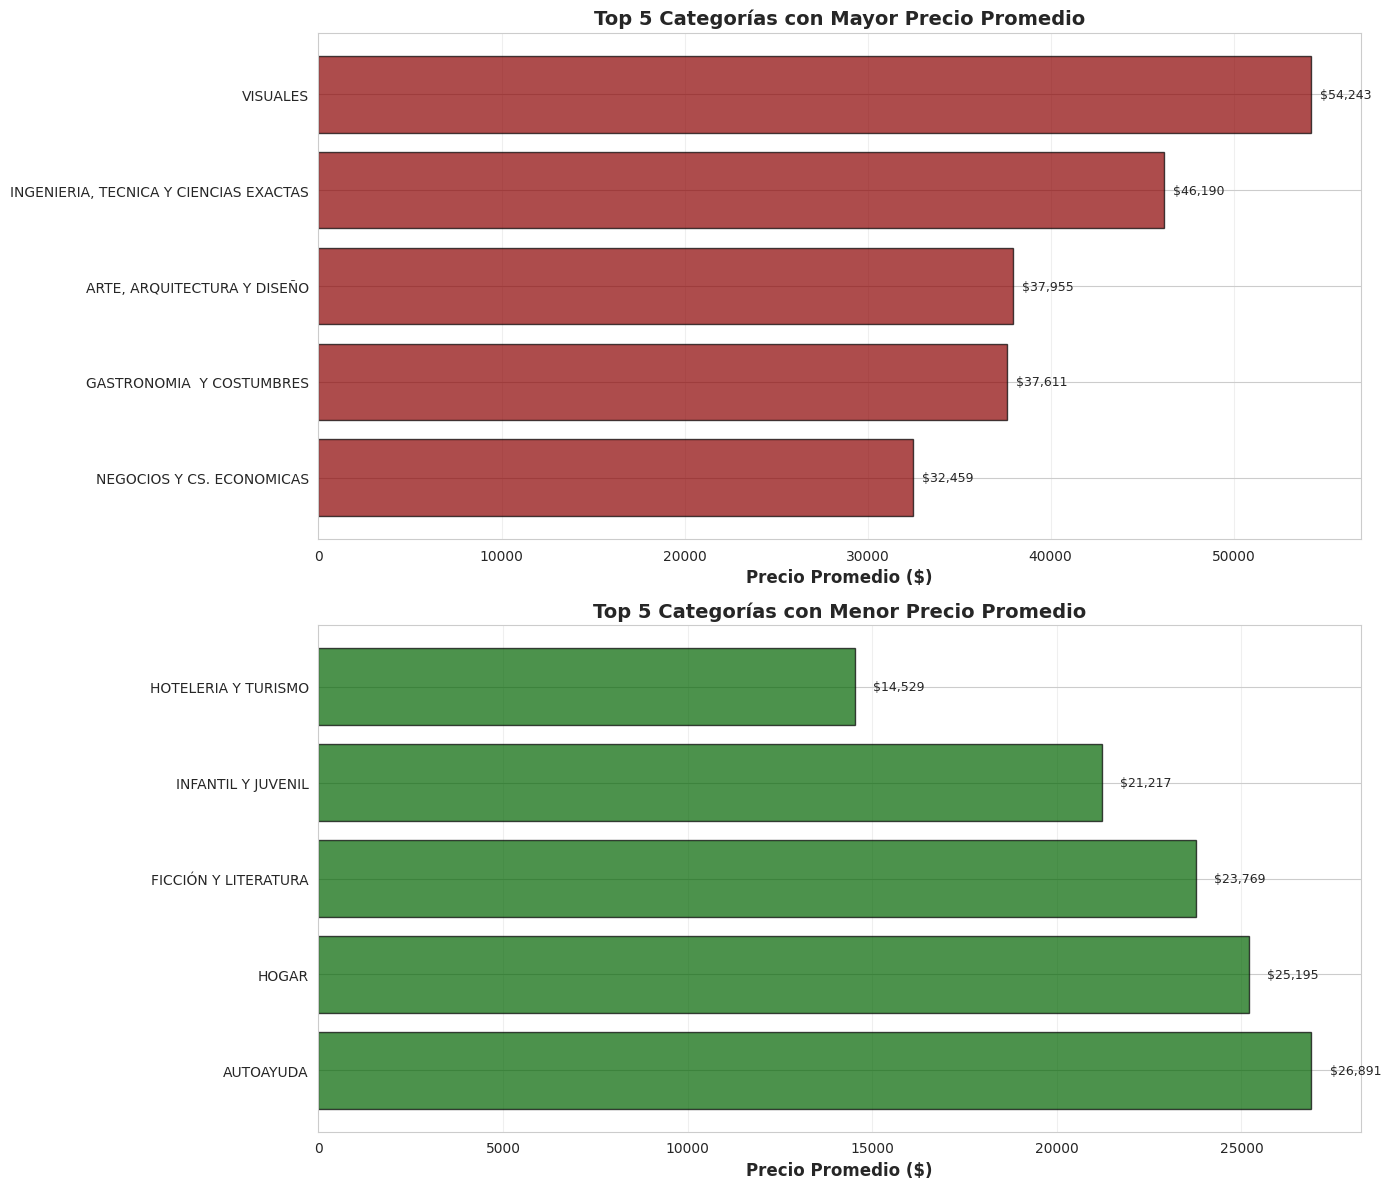


📚 CATEGORÍAS MÁS CARAS:
   VISUALES: $54,242.70 (promedio)
   INGENIERIA, TECNICA Y CIENCIAS EXACTAS: $46,190.33 (promedio)
   ARTE, ARQUITECTURA Y DISEÑO: $37,955.40 (promedio)

📚 CATEGORÍAS MÁS ECONÓMICAS:
   HOTELERIA Y TURISMO: $14,528.85 (promedio)
   INFANTIL Y JUVENIL: $21,217.07 (promedio)
   FICCIÓN Y LITERATURA: $23,769.15 (promedio)


In [ ]:
# Calculamos precio promedio por categoría
precio_por_categoria = df.groupby('categoria')['precio'].agg(['mean', 'median', 'count'])
# Filtramos categorías con al menos 50 libros
precio_por_categoria = precio_por_categoria[precio_por_categoria['count'] >= 50]
precio_por_categoria = precio_por_categoria.sort_values('mean', ascending=False).head(5)

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Top 5 categorías más caras
axes[0].barh(range(len(precio_por_categoria)), precio_por_categoria['mean'].values,
             color='darkred', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(precio_por_categoria)))
axes[0].set_yticklabels(precio_por_categoria.index, fontsize=10)
axes[0].set_xlabel('Precio Promedio ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Top 5 Categorías con Mayor Precio Promedio', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

for i, v in enumerate(precio_por_categoria['mean'].values):
    axes[0].text(v + 500, i, f'${v:,.0f}', va='center', fontsize=9)

# Top 5 categorías más baratas
precio_por_categoria_baratas = df.groupby('categoria')['precio'].agg(['mean', 'median', 'count'])
precio_por_categoria_baratas = precio_por_categoria_baratas[precio_por_categoria_baratas['count'] >= 50]
precio_por_categoria_baratas = precio_por_categoria_baratas.sort_values('mean', ascending=True).head(5)

axes[1].barh(range(len(precio_por_categoria_baratas)), precio_por_categoria_baratas['mean'].values,
             color='darkgreen', edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(precio_por_categoria_baratas)))
axes[1].set_yticklabels(precio_por_categoria_baratas.index, fontsize=10)
axes[1].set_xlabel('Precio Promedio ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Top 5 Categorías con Menor Precio Promedio', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(precio_por_categoria_baratas['mean'].values):
    axes[1].text(v + 500, i, f'${v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n📚 CATEGORÍAS MÁS CARAS:")
for cat in precio_por_categoria.head(3).index:
    print(f"   {cat}: ${precio_por_categoria.loc[cat, 'mean']:,.2f} (promedio)")

print(f"\n📚 CATEGORÍAS MÁS ECONÓMICAS:")
for cat in precio_por_categoria_baratas.head(3).index:
    print(f"   {cat}: ${precio_por_categoria_baratas.loc[cat, 'mean']:,.2f} (promedio)")

Los libros cuya categoria es 'Ficcion y literatura' y los pertenecientes a la categoria 'Infantil y Juvenil' son de los mas baratos en promedio y a su vez son las categorias mas frecuentes en cuanto a cantidad de libros en el catalogo por lo que podemos entender que esto es lo que hace que la curva se mueva a la derecha en la campana. Y que en el caso de hoteleria y turismo a pesar de ser la categoria mas barata es de la que menos cantidad de libros hay.

### Analisis Multivariado

Vamos a graficar las relaciones de las variables con la target a traves de la varianza:

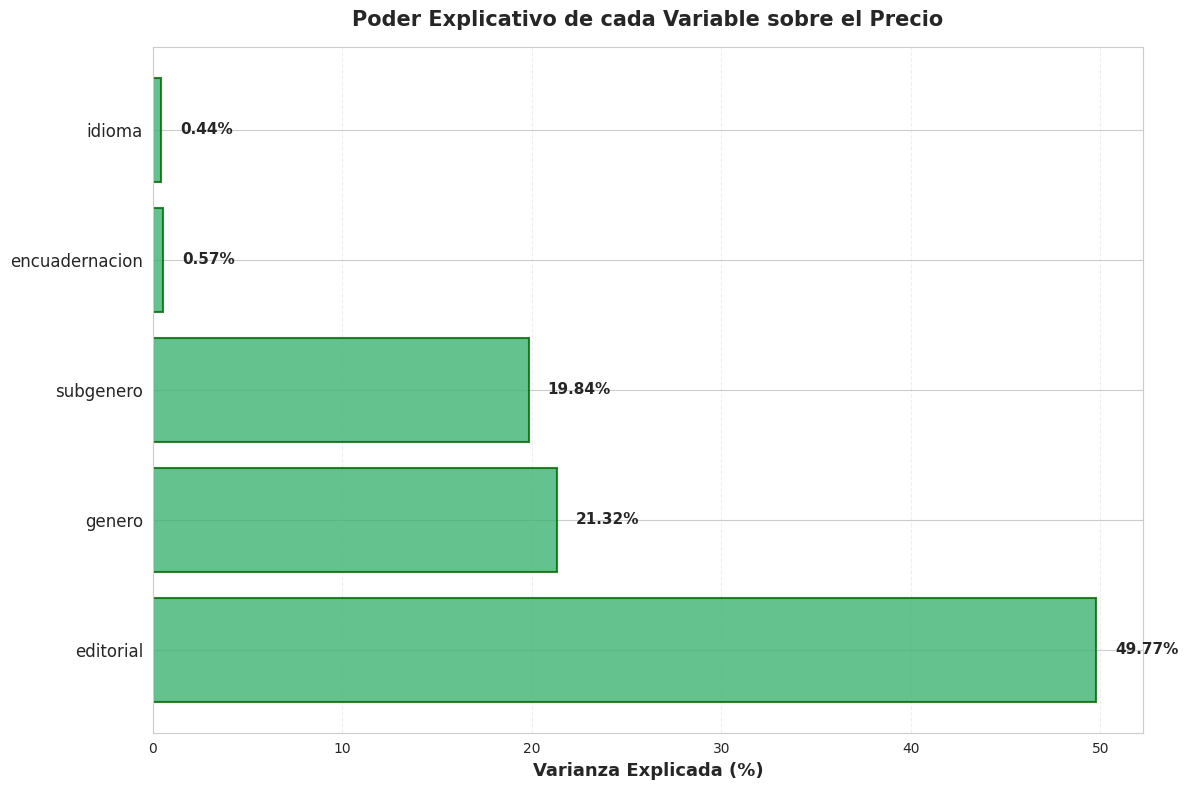

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

# Calculamos la varianza entre grupos vs varianza total para cada variable
variables_cat = ['encuadernacion', 'idioma', 'editorial', 'genero', 'subgenero']
varianza_explicada = {}

for var in variables_cat:
    # Varianza entre grupos
    grupos = df.groupby(var)['precio'].mean()
    varianza_entre = ((grupos - df['precio'].mean())**2 * df.groupby(var)['precio'].count()).sum()
    varianza_total = ((df['precio'] - df['precio'].mean())**2).sum()
    r_cuadrado = varianza_entre / varianza_total
    varianza_explicada[var] = r_cuadrado * 100

# graficamos
var_exp_sorted = dict(sorted(varianza_explicada.items(), key=lambda x: x[1], reverse=True))
bars = ax.barh(range(len(var_exp_sorted)), list(var_exp_sorted.values()),
                alpha=0.8, color='mediumseagreen', edgecolor='darkgreen', linewidth=1.5)
ax.set_yticks(range(len(var_exp_sorted)))
ax.set_yticklabels(list(var_exp_sorted.keys()), fontsize=12)
ax.set_xlabel('Varianza Explicada (%)', fontweight='bold', fontsize=13)
ax.set_title('Poder Explicativo de cada Variable sobre el Precio',
             fontweight='bold', pad=15, fontsize=15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, (bar, val) in enumerate(zip(bars, var_exp_sorted.values())):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.2f}%',
             va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()



Poder explicativo de variables categóricas:
   - editorial: 49.77% de la varianza
   - genero: 21.32% de la varianza
   - subgenero: 19.84% de la varianza
   - encuadernacion: 0.57% de la varianza
   - idioma: 0.44% de la varianza

CONCLUSIÓN: La variable 'editorial' es la que mejor explica
la variación de precios con un 49.77% de varianza explicada.

Con la ayuda de la ia transformamos las variables a traves de su precio promedio en numericas para poder medir las relaciones entre ellas y poder entender mas de cerca y por fuera de la variable target:

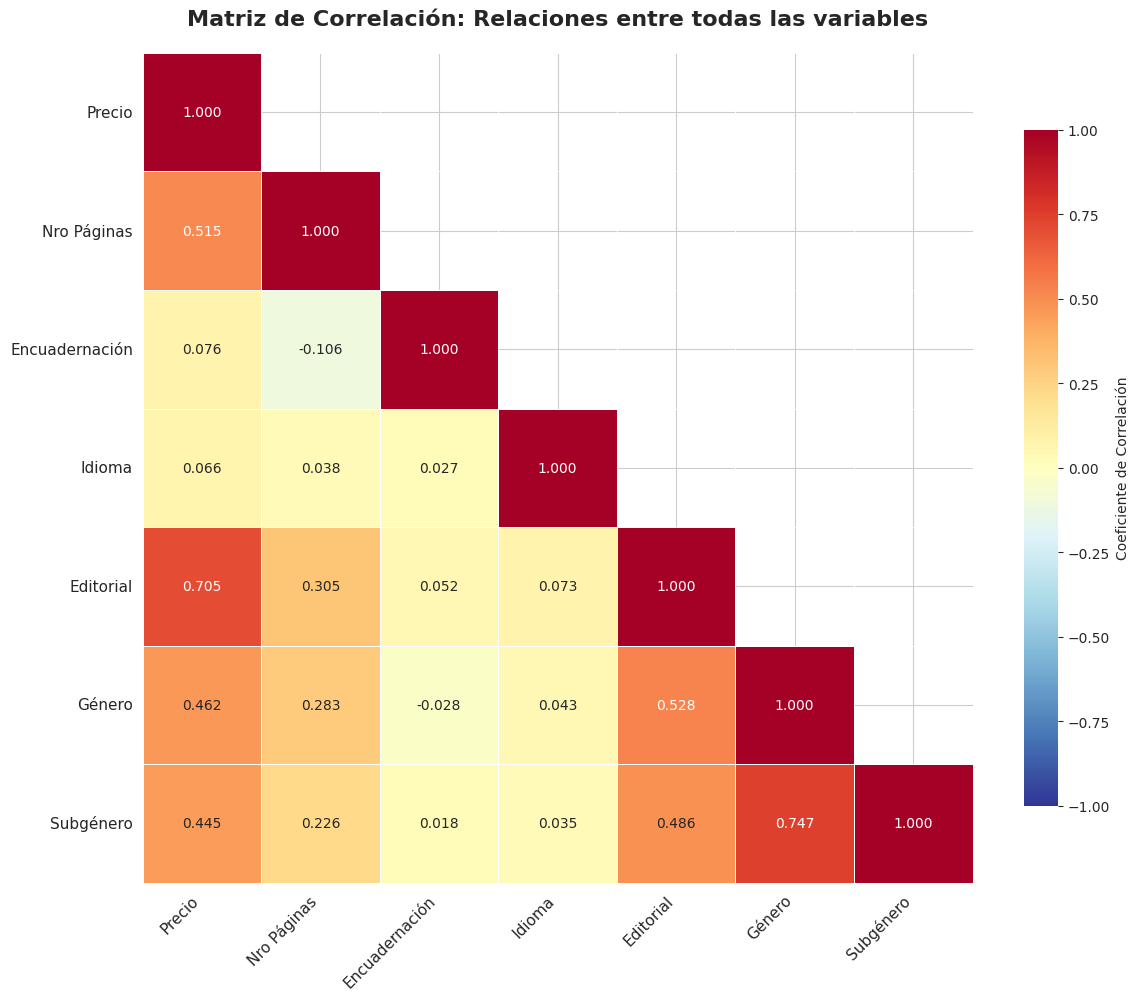

In [21]:
df_corr = df.copy()

# Convertir variables categóricas a numéricas usando diferentes estrategias

# 1. Encuadernación: por precio promedio
encuad_map = df.groupby('encuadernacion')['precio'].mean().to_dict()
df_corr['encuadernacion_num'] = df_corr['encuadernacion'].map(encuad_map)

# 2. Idioma: por precio promedio
idioma_map = df.groupby('idioma')['precio'].mean().to_dict()
df_corr['idioma_num'] = df_corr['idioma'].map(idioma_map)

# 3. Editorial: por precio promedio
editorial_map = df.groupby('editorial')['precio'].mean().to_dict()
df_corr['editorial_num'] = df_corr['editorial'].map(editorial_map)

# 4. Género: por precio promedio
genero_map = df.groupby('genero')['precio'].mean().to_dict()
df_corr['genero_num'] = df_corr['genero'].map(genero_map)

# 5. Subgénero: por precio promedio
subgenero_map = df.groupby('subgenero')['precio'].mean().to_dict()
df_corr['subgenero_num'] = df_corr['subgenero'].map(subgenero_map)

# Seleccionar solo las columnas numéricas para la correlación
columnas_analisis = {
    'precio': 'Precio',
    'nro_paginas': 'Nro Páginas',
    'encuadernacion_num': 'Encuadernación',
    'idioma_num': 'Idioma',
    'editorial_num': 'Editorial',
    'genero_num': 'Género',
    'subgenero_num': 'Subgénero'
}

# Crear DataFrame con las columnas seleccionadas
df_analisis = df_corr[list(columnas_analisis.keys())].copy()
df_analisis.columns = list(columnas_analisis.values())

# Calcular matriz de correlación
correlation_matrix = df_analisis.corr()

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Crear heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # Máscara para triángulo superior
sns.heatmap(correlation_matrix,
            annot=True,  # Mostrar valores
            fmt='.3f',  # Formato de 3 decimales
            cmap='RdYlBu_r',  # Colormap (rojo=positivo, azul=negativo)
            center=0,  # Centro en 0
            square=True,  # Celdas cuadradas
            linewidths=0.5,  # Líneas entre celdas
            cbar_kws={'label': 'Coeficiente de Correlación', 'shrink': 0.8},
            vmin=-1, vmax=1,  # Rango de valores
            ax=ax,
            mask=mask)  # Aplicar máscara

# Ajustar título y etiquetas
ax.set_title('Matriz de Correlación: Relaciones entre todas las variables',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('')
ax.set_ylabel('')

# Rotar etiquetas
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()


# Obtener correlaciones con precio (excluyendo la diagonal)
corr_precio = correlation_matrix['Precio'].drop('Precio').sort_values(ascending=False)



=== ANÁLISIS DE CORRELACIONES ===

📊 CORRELACIONES CON EL PRECIO:

   Editorial:  0.705       [FUERTE positiva]

   Nro Páginas:  0.515     [FUERTE positiva]

   Género:  0.462          [MODERADA positiva]

   Subgénero:  0.445       [MODERADA positiva]

   Encuadernación:  0.076  [muy débil/nula]

   Idioma:  0.066          [muy débil/nula]


📈 TOP 5 CORRELACIONES MÁS FUERTES (entre otras variables):

   Subgénero ↔ Género: 0.747    (positiva)

   Precio ↔ Editorial: 0.705    (positiva)

   Editorial ↔ Género: 0.528    (positiva)

   Nro Páginas ↔ Precio: 0.515  (positiva)

   Subgénero ↔ Editorial: 0.486 (positiva)


💡 NOTA: Las variables categóricas fueron codificadas por su precio promedio
   para poder calcular correlaciones. Esto permite identificar qué categorías
   tienden a asociarse con precios más altos o más bajos.